# 네이버 영화평 조회
- 영화 선택
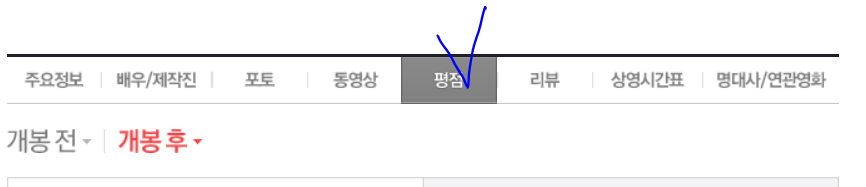

- 평점에서 페이지 선택 후 링크 href 찾기
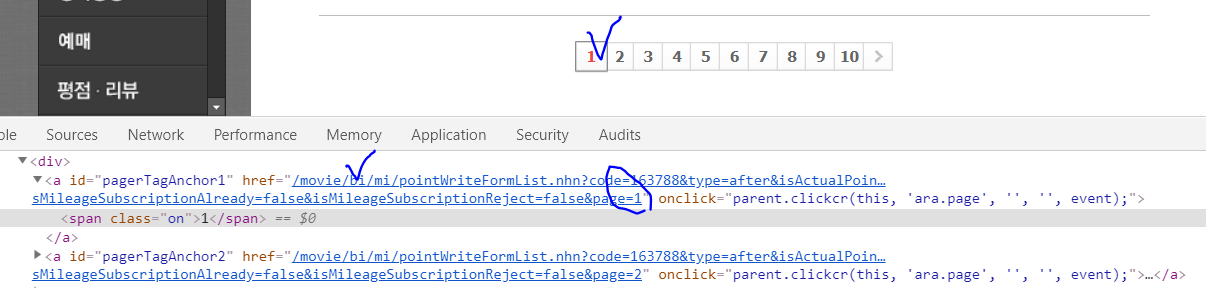

# Guide : 평점 5-7 사이의 영화를 선택하자. 영화목록에서 선택할 때 참여자 수를 보고 그에 맞게 페이지 지정

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
# page 1 평점 조회
url ='https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=179875&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1'
res = requests.get(url)
bs = BeautifulSoup(res.text, 'lxml')

## 평점, 내용 조회
- F12로 조회 후 
- 전체 : div.score_result ul 의 li 단위로 리뷰가 있음.
- 평점 :  div.star_score em (star_score가 상단에 있다.)
- 내용 :  div.score_reple p 
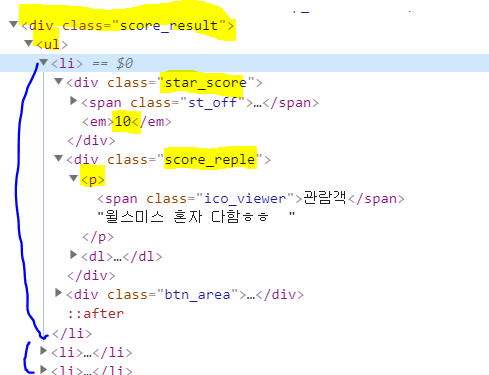

In [4]:
# find와 find_all() 사용.
jumsu = []
texts = []

reviews = bs.find("div", {'class':'score_result'}).find('ul').find_all('li')
print('리뷰수 : ', len(reviews))
for li_tag in reviews:
    j = li_tag.find("em").get_text()
    t = li_tag.find('div',{'class':'score_reple'}).find('p').get_text().strip()
    jumsu.append(j)
    texts.append(t)

리뷰수 :  10


In [20]:
# select 함수를 이용해 css selector 사용
scores = bs.select('div.score_result > ul > li > em')
texts = bs.select('div.score_result > ul > li > div.score_reple > p')

jumsu2 = []
text2 = []
for score in scores:
    jumsu2.append(score.get_text().strip())
    
for text in texts:
    text2.append(text.get_text().strip())

In [21]:
import pandas as pd
df = pd.DataFrame({'score':jumsu, 'review':texts})
df

,score,review
0,7,"[\n, 스포일러 컨텐츠로 처리되는지 여부 , \n, [\n, [\n, <a da..."
1,2,"[\n, 스포일러 컨텐츠로 처리되는지 여부 , \n, [\r\n\t\t\t\t\t..."
2,1,"[\n, 스포일러 컨텐츠로 처리되는지 여부 , \n, [\r\n\t\t\t\t\t..."
3,1,"[\n, 스포일러 컨텐츠로 처리되는지 여부 , \n, [\r\n\t\t\t\t\t..."
4,2,"[\n, 스포일러 컨텐츠로 처리되는지 여부 , \n, [\r\n\t\t\t\t\t..."
5,1,"[\n, 스포일러 컨텐츠로 처리되는지 여부 , \n, [\r\n\t\t\t\t\t..."
6,2,"[\n, 스포일러 컨텐츠로 처리되는지 여부 , \n, [\r\n\t\t\t\t\t..."
7,10,"[\n, 스포일러 컨텐츠로 처리되는지 여부 , \n, [\r\n\t\t\t\t\t..."
8,1,"[\n, 스포일러 컨텐츠로 처리되는지 여부 , \n, [\r\n\t\t\t\t\t..."
9,1,"[\n, 스포일러 컨텐츠로 처리되는지 여부 , \n, [\r\n\t\t\t\t\t..."


# TODO - 네이버 영화 평점을 조회하는 함수 작성
- 매개변수로 페이지 번호를 받아서 그 페이지 까지의 평점을 조회해 DataFrame으로 만든다.
- DataFrame의 컬럼
    - score : 점수
    - review: 리뷰

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_review_df(page=1):
    url ='https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=179875&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}'
    jumsu = []
    texts = []
    for pageNum in range(1, page+1): #end 포함을 위해
        res = requests.get(url.format(pageNum))
        bs = BeautifulSoup(res.text, 'lxml')
        
#         reviews = bs.find("div", {'class':'score_result'}).find('ul').find_all('li')
        reviews = bs.select('div.score_result > ul > li')
        for li_tag in reviews:
#             j = li_tag.find("em").get_text()
            j = li_tag.select_one('em').text
#             t = li_tag.find('div',{'class':'score_reple'}).find('p').get_text().strip()
            t = li_tag.select_one('div.score_reple > p').text.strip()
            jumsu.append(j)
            texts.append(t)
    
    return  pd.DataFrame({'score':pd.Series(jumsu, dtype='int') , 'review':texts})    

In [15]:
review_df = get_review_df(2)

In [16]:
review_df.shape

(20, 2)

In [17]:
review_df.tail()

,score,review
15,3,액션 영화도 2시간 내내 액션이 나오는건 아니고 애로영화도 2시간 내내 배드신이 나...
16,8,이성민의 연기는 좋네요
17,1,고라니가 애쓴 영화. 왜 두번이나 죽여.
18,2,아무리 생각해도 영화의 전체적인 내용전개의 깊이가 무엇인지 모르겠음....마지막으로...
19,1,오랜만에 더럽게 재미없는 걸 극장에서 돈 주고 봤다 졸ㄹ 열받네


In [11]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
score     800 non-null int32
review    800 non-null object
dtypes: int32(1), object(1)
memory usage: 9.5+ KB


In [119]:
review_df.score.mean()

6.50375

In [120]:
review_df.score.min()

1

In [124]:
review_df.score.value_counts().sort_index()

1     158
2      67
3       9
4      35
5      16
6      45
7      18
8      82
9      88
10    282
Name: score, dtype: int64

# 감성 컬럼 추가
- 감성분석 : 긍/부정 분석
    - 긍정 : 1
    - 부정 : 0

In [125]:
import numpy as np
review_df['sentiment'] = np.where(review_df.score>=5, 1, 0)

In [127]:
review_df.head(10)

,score,review,sentiment
0,10,내용을 떠나서 이성민의 연기는 정말...,1
1,10,<확정>이성민 2년연속 각종 영화제 최우수연기자 후보 선정,1
2,7,그냥 배우들 연기 빼면 시체인 영화..스토리 개연성도 없고 쓸데 없이 늘어지고 뭔이...,1
3,8,단순한 재미 뿐만 아니라 인간의 내면에 대해서도 생각이 많아지게 하는 영화였다,1
4,8,관람객스릴러가 이래야지~~ ㅋㅋㅋ,1
5,1,영화 보고나오니 두통이 왓다..노루는 뭔죄?,0
6,9,관람객미친 연기 보여주는 배우들만으로도 볼 재미가 충분,1
7,10,정말 지독하다.. 그리고 몰입도 쩐다. 진짜 연기 장인들!!,1
8,8,이성민의 연기는 좋네요,1
9,8,"관람객볼 가치가 충분한 영화, 단순 스릴러의 긴장감 그 이상의 여운.",1


In [128]:
review_df.sentiment.value_counts()

1    531
0    269
Name: sentiment, dtype: int64